In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../cleaning_process/processed_data.csv')
print(df.head())

       Country  Adult Literacy Rate  ICT Service Exports  R&D Expenditure  \
0  Afghanistan             7.828516             0.833702           169.19   
1      Albania             3.013976             0.154120           238.59   
2      Algeria             2.213114             0.478650          7606.65   
3      Andorra             4.348926             0.833702             9.60   
4       Angola            45.414760             0.032290            44.99   

   Journal Articles  Patent Applications  Mobile Subscriptions  \
0      14172.405405            56.554435              0.080087   
1         23.000000            97.885707             22.472000   
2        268.000000           109.165357             12.008700   
3          3.000000           142.214121             51.740100   
4          2.000000            67.373474              0.373669   

   Fixed Broadband Subscriptions  Secure Internet Servers (per million)  \
0                      43.758544                                 

In [11]:
numeric_df = df.select_dtypes(include='number')

# for x_var, y_var in combinations(numeric_df.columns, 2):
#     x = numeric_df[x_var].dropna()
#     y = numeric_df[y_var].dropna()

#     common_index = x.index.intersection(y.index)
#     x = x.loc[common_index]
#     y = y.loc[common_index]

#     plt.figure(figsize=(6, 4))
#     plt.scatter(x, y, alpha=0.6, s=25)
#     plt.title(f"{x_var} vs {y_var}")
#     plt.xlabel(x_var)
#     plt.ylabel(y_var)

#     if len(x) > 1 and len(np.unique(x)) > 1:
#         coeffs = np.polyfit(x, y, 1)
#         poly_eq = np.poly1d(coeffs)
#         plt.plot(np.sort(x), poly_eq(np.sort(x)), color='red', linewidth=2)

#     plt.tight_layout()
#     plt.show()


In [12]:
correlation_results = []

for x_var, y_var in combinations(numeric_df.columns, 2):
    x = numeric_df[x_var].dropna()
    y = numeric_df[y_var].dropna()
    
    common_index = x.index.intersection(y.index)
    x = x.loc[common_index]
    y = y.loc[common_index]

    if len(x) > 1 and len(y) > 1 and len(np.unique(x)) > 1 and len(np.unique(y)) > 1:
        corr, p_val = pearsonr(x, y)
        correlation_results.append({
            "Variable 1": x_var,
            "Variable 2": y_var,
            "Pearson r": round(corr, 4),
            "p-value": f"{p_val:.4e}"
        })

correlation_df = pd.DataFrame(correlation_results)

print("\nPearson Correlation Table:\n")
print(correlation_df.to_string(index=False))


Pearson Correlation Table:

                           Variable 1                             Variable 2  Pearson r     p-value
                  Adult Literacy Rate                    ICT Service Exports     0.2166  3.6901e-03
                  Adult Literacy Rate                        R&D Expenditure     0.0831  2.7001e-01
                  Adult Literacy Rate                       Journal Articles     0.0361  6.3190e-01
                  Adult Literacy Rate                    Patent Applications     0.1029  1.7182e-01
                  Adult Literacy Rate                   Mobile Subscriptions     0.0833  2.6872e-01
                  Adult Literacy Rate          Fixed Broadband Subscriptions     0.1668  2.6020e-02
                  Adult Literacy Rate  Secure Internet Servers (per million)    -0.0094  9.0084e-01
                  Adult Literacy Rate          Secure Internet Servers (alt)     0.0165  8.2690e-01
                  Adult Literacy Rate                         Internet 

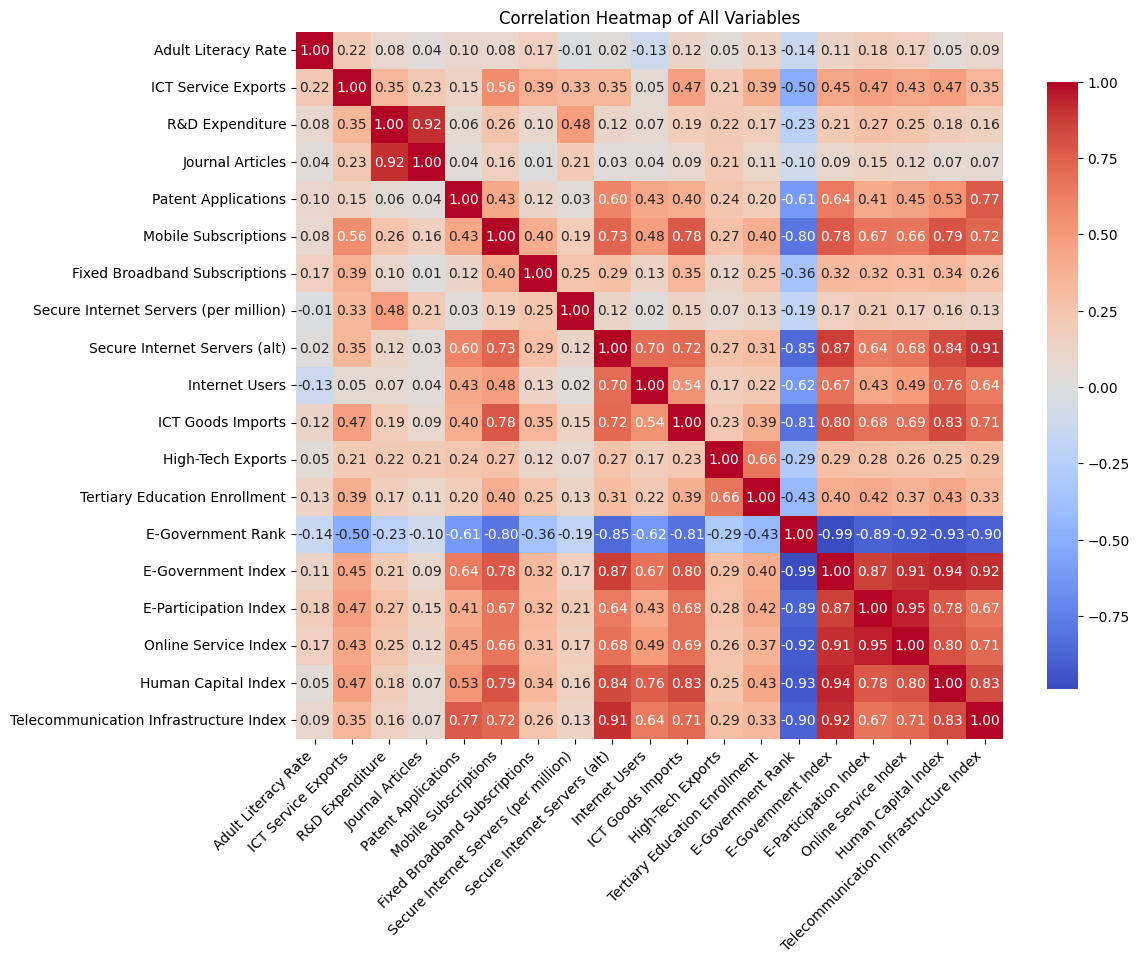

In [13]:
correlation_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap of All Variables")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
corr_matrix = numeric_df.corr().abs()

mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = corr_matrix.where(mask)

top_corrs = corr_pairs.unstack().dropna().sort_values(ascending=False).head(10)

print("Top 4 Highest Absolute Correlations (excluding self-correlations):\n")
for (var1, var2), corr_value in top_corrs.items():
    print(f"{var1} ↔ {var2} = {corr_value:.4f}")

Top 4 Highest Absolute Correlations (excluding self-correlations):

E-Government Index ↔ E-Government Rank = 0.9892
Online Service Index ↔ E-Participation Index = 0.9519
Human Capital Index ↔ E-Government Index = 0.9402
Human Capital Index ↔ E-Government Rank = 0.9320
Telecommunication Infrastructure Index ↔ E-Government Index = 0.9221
Journal Articles ↔ R&D Expenditure = 0.9169
Online Service Index ↔ E-Government Rank = 0.9159
Telecommunication Infrastructure Index ↔ Secure Internet Servers (alt) = 0.9103
Online Service Index ↔ E-Government Index = 0.9096
Telecommunication Infrastructure Index ↔ E-Government Rank = 0.8950


based on this table the variables that have to be removed are 
- E-Government rank
- Online Service Index
- Journal Articles
- Human Capital Index

This is because they have high correlations with these variables:
- E-Goverment Index - 0.9892
- Online Service Index - 0.9519
- R&D Expenditure - 0.9169
- E-Government Index - 0.9402

In [4]:
columns_to_drop = [
    "E-Government Rank",
    "Online Service Index",
    "Journal Articles",
    "Human Capital Index"
]

reduced_df = df.drop(columns=columns_to_drop)
reduced_df.to_csv('../cleaning_process/reduced_data.csv', index=False)
print(reduced_df.columns.to_list())
df = pd.read_csv('../cleaning_process/reduced_data.csv')

['Country', 'Adult Literacy Rate', 'ICT Service Exports', 'R&D Expenditure', 'Patent Applications', 'Mobile Subscriptions', 'Fixed Broadband Subscriptions', 'Secure Internet Servers (per million)', 'Secure Internet Servers (alt)', 'Internet Users', 'ICT Goods Imports', 'High-Tech Exports', 'Tertiary Education Enrollment', 'E-Government Index', 'E-Participation Index', 'Telecommunication Infrastructure Index']


Before starting, we need to group the variables into sub-indices 
- Education & Human Capital
    -  Adult Literacy Rate
    - Tertiary Education Enrollment
- Innovation & R&D
    - R&D Expenditure
    - Patent Applications
- Access & Connectivity
    - Mobile Subscriptions
    - Fixed Broadband Subscriptions
    - Internet Users    
- Infrastructure & Security
    - Secure Internet Servers (per million)
    - Secure Internet Servers (alt)
    - Telecommunication Infrastructure Index
- Digital Trade & Economy
    - ICT Goods Imports
    - High-Tech Exports
    - ICT Service Exports
- Digital Governance & Participation
    - E-Government Index
    - E-Participation Index

In [5]:
sub_indices = {
    "education_human_capital": [
        "Country", "Adult Literacy Rate", "Tertiary Education Enrollment"
    ],
    "innovation_rd": [
        "Country", "R&D Expenditure", "Patent Applications"
    ],
    "access_connectivity": [
        "Country", "Mobile Subscriptions", "Fixed Broadband Subscriptions", "Internet Users"
    ],
    "infrastructure_security": [
        "Country", "Secure Internet Servers (per million)", "Secure Internet Servers (alt)",
        "Telecommunication Infrastructure Index"
    ],
    "digital_trade_economy": [
        "Country", "ICT Goods Imports", "High-Tech Exports", "ICT Service Exports"
    ],
    "digital_governance_participation": [
        "Country", "E-Government Index", "E-Participation Index"
    ]
}

for name, columns in sub_indices.items():
    sub_df = df[columns]
    sub_df = sub_df.rename(columns=lambda x: x.replace(" ", "_"))
    sub_df = sub_df.rename(columns=lambda x: x.replace("(", "").replace(")", ""))
    sub_df.to_csv(f"sub_indices/{name}_cleaned.csv", index=False)
    print(f"Saved {name}.csv")

Saved education_human_capital.csv
Saved innovation_rd.csv
Saved access_connectivity.csv
Saved infrastructure_security.csv
Saved digital_trade_economy.csv
Saved digital_governance_participation.csv


<h1>Standardisation</h1>

In [6]:
def standardize_sub_index(file_path):
    df = pd.read_csv(file_path)

    country_col = df[['Country']]
    
    data_to_scale = df.drop(columns=['Country'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_to_scale)

    scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)
    standardised_df = pd.concat([country_col, scaled_df], axis=1)

    return standardised_df

standarised_df = standardize_sub_index("sub_indices/access_connectivity_cleaned.csv")
standarised_df.to_csv("sub_indices/access_connectivity_standardised.csv", index=False)

standarised_df = standardize_sub_index("sub_indices/digital_governance_participation_cleaned.csv")
standarised_df.to_csv("sub_indices/digital_governance_participation_standardised.csv", index=False)

standarised_df = standardize_sub_index("sub_indices/digital_trade_economy_cleaned.csv")
standarised_df.to_csv("sub_indices/digital_trade_economy_standardised.csv", index=False)

standarised_df = standardize_sub_index("sub_indices/education_human_capital_cleaned.csv")
standarised_df.to_csv("sub_indices/education_human_capital_standardised.csv", index=False)

standarised_df = standardize_sub_index("sub_indices/infrastructure_security_cleaned.csv")
standarised_df.to_csv("sub_indices/infrastructure_security_standardised.csv", index=False)

standarised_df = standardize_sub_index("sub_indices/innovation_rd_cleaned.csv")
standarised_df.to_csv("sub_indices/innovation_rd_standardised.csv", index=False)

In [7]:
def print_numeric_column_means(file_path):
    df = pd.read_csv(file_path)
    
    numeric_cols = df.select_dtypes(include='number')
    
    for col in numeric_cols.columns:
        mean_val = numeric_cols[col].mean()
        print(f"{col}: {mean_val:.4f}")

print_numeric_column_means("sub_indices/access_connectivity_standardised.csv")
print_numeric_column_means("sub_indices/digital_governance_participation_standardised.csv")
print_numeric_column_means("sub_indices/digital_trade_economy_standardised.csv")
print_numeric_column_means("sub_indices/education_human_capital_standardised.csv")
print_numeric_column_means("sub_indices/infrastructure_security_standardised.csv")
print_numeric_column_means("sub_indices/innovation_rd_standardised.csv")


Mobile_Subscriptions: 0.0000
Fixed_Broadband_Subscriptions: 0.0000
Internet_Users: 0.0000
E-Government_Index: -0.0000
E-Participation_Index: -0.0000
ICT_Goods_Imports: 0.0000
High-Tech_Exports: 0.0000
ICT_Service_Exports: -0.0000
Adult_Literacy_Rate: 0.0000
Tertiary_Education_Enrollment: -0.0000
Secure_Internet_Servers_per_million: 0.0000
Secure_Internet_Servers_alt: 0.0000
Telecommunication_Infrastructure_Index: -0.0000
R&D_Expenditure: 0.0000
Patent_Applications: 0.0000


Now that the data is standardised, we can process with PCA
